# Load libraries

In [2]:
import numpy as np
import pandas as pd
import os

# Specify git executable file for GitPython in Jupyter Notebook (In IDE, it can still work without this line.)
os.environ["GIT_PYTHON_GIT_EXECUTABLE"] = "D:\Git\cmd\git.exe"

import git
from git import RemoteProgress

from git import Repo
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Clone repo from GitHub

Link: https://git-scm.com/docs/git-clone <br>
<b>Note:</b> In case too-long file path issue occurs in Windows, set <code>git config --system core.longpaths true</code>

In [3]:
class Progress(RemoteProgress):
    def update(self, op_code, cur_count, max_count=None, message=''):
        print(self._cur_line)

In [4]:
remote_link = "https://github.com/eclipse/jetty.project"
local_link = "./repo/jetty"
# Uncomment to clone
#Repo.clone_from(remote_link, local_link, progress=Progress())

In [88]:
repo = Repo(local_link)
fixing_commit = "4df5647f6dfdc5fa7abb812afe9290d60b17c098"
affected_file = "jetty-http/src/main/java/org/eclipse/jetty/http/HttpParser.java"

# Show info of a commit
Link: https://git-scm.com/docs/git-show
You can explore different parameters.

In [114]:
show_data = repo.git.show("-s", fixing_commit).splitlines()
for line in show_data:
    print(line)

commit 4df5647f6dfdc5fa7abb812afe9290d60b17c098
Author: Joakim Erdfelt <joakim.erdfelt@gmail.com>
Date:   Mon Feb 23 14:44:24 2015 -0700

    460642 - HttpParser error 400 can expose previous buffer contents in HTTP status reason message


# Show all developers across all branches
Link: https://git-scm.com/docs/git-shortlog

In [115]:
commit_authors = repo.git.shortlog("-sne", "--all").splitlines()

author_commits = []

for commit_author in commit_authors:
    commit, author = commit_author.split("\t")
    author_commits.append([int(commit), author])

In [116]:
df = pd.DataFrame(author_commits, columns=['Commit', 'Author'])

In [117]:
df.head()

,Commit,Author
0,4570,Joakim Erdfelt <joakim.erdfelt@gmail.com>
1,4233,Simone Bordet <simone.bordet@gmail.com>
2,2577,Greg Wilkins <gregw@webtide.com>
3,2369,Jesse McConnell <jesse.mcconnell@gmail.com>
4,1789,Greg Wilkins <gregw@intalio.com>


## Top 10 most active developers in the project

<AxesSubplot:xlabel='Commit', ylabel='Author'>

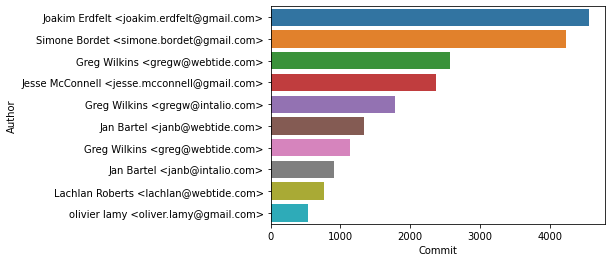

In [118]:
sns.barplot(y='Author', x="Commit", data=df[:10])

# Code changes between 2 commits
<b>Note:</b> Watch out for the initial commit (no parent commit)

In [168]:
diff_data = repo.git.diff(fixing_commit + "^", fixing_commit).splitlines()
for line in diff_data:
    print(line)

diff --git a/jetty-http/src/main/java/org/eclipse/jetty/http/HttpParser.java b/jetty-http/src/main/java/org/eclipse/jetty/http/HttpParser.java
index 950867ff26..cd660da660 100644
--- a/jetty-http/src/main/java/org/eclipse/jetty/http/HttpParser.java
+++ b/jetty-http/src/main/java/org/eclipse/jetty/http/HttpParser.java
@@ -18,6 +18,8 @@
 
 package org.eclipse.jetty.http;
 
+import static org.eclipse.jetty.http.HttpTokens.*;
+
 import java.nio.ByteBuffer;
 import java.nio.charset.StandardCharsets;
 
@@ -31,11 +33,6 @@ import org.eclipse.jetty.util.TypeUtil;
 import org.eclipse.jetty.util.log.Log;
 import org.eclipse.jetty.util.log.Logger;
 
-import static org.eclipse.jetty.http.HttpTokens.CARRIAGE_RETURN;
-import static org.eclipse.jetty.http.HttpTokens.LINE_FEED;
-import static org.eclipse.jetty.http.HttpTokens.SPACE;
-import static org.eclipse.jetty.http.HttpTokens.TAB;
-
 
 /* ------------------------------------------------------------ */
 /** A Parser for HTTP 0.9, 1.0 and 1.1
@@ -33

# Identify the last commit that changes a line modified in the current commit

Link: https://git-scm.com/docs/git-blame

In [138]:
blame_data = repo.git.blame("-L1721,+1", fixing_commit+"^","--", affected_file).splitlines()
for line in blame_data:
    print(line)

da627b843fe (Greg Wilkins 2009-03-24 21:07:27 +0000 1721) }


Link: https://git-scm.com/docs/git-log <br> Watch out for initial commit (no parent commit)

# Show all the commit history between two commits

In [194]:
last_commit = blame_data[0].strip().split()[0]
log_date = repo.git.log(last_commit + ".." + fixing_commit,affected_file).splitlines()


In [195]:
log_date

['commit 4df5647f6dfdc5fa7abb812afe9290d60b17c098',
 'Author: Joakim Erdfelt <joakim.erdfelt@gmail.com>',
 'Date:   Mon Feb 23 14:44:24 2015 -0700',
 '',
 '    460642 - HttpParser error 400 can expose previous buffer contents in HTTP status reason message',
 '',
 'commit 2b2a70a93a50fd20f17f38be82b8e15d1365dccd',
 'Author: Greg Wilkins <gregw@intalio.com>',
 'Date:   Fri Feb 13 11:41:18 2015 +1100',
 '',
 '    459845 Support upgrade',
 '    ',
 '    Added the concept of UpgradeFrom and UpgradeTo connections that support',
 '    transferring a buffer with content before opening new connection.',
 '    Aded EndPoint.update method as utility',
 '',
 'commit 6a0668b7a1e18813ef5c1e20b622b29c0a8aae30',
 'Author: Joakim Erdfelt <joakim.erdfelt@gmail.com>',
 'Date:   Wed Jan 7 17:03:30 2015 -0700',
 '',
 '    Happy New Year 2015',
 '',
 'commit ba3228fa21784b7e534b5872581aca62acd1cdcb',
 'Author: Simone Bordet <simone.bordet@gmail.com>',
 'Date:   Tue Dec 2 21:06:51 2014 +0100',
 '',
 '    453

In [183]:
last_commit = blame_data[0].strip().split()[0]
log_developer = repo.git.log("--pretty=format:%an",affected_file).splitlines()
list(set(log_developer))

['Joakim Erdfelt',
 'Jan Bartel',
 'Greg Wilkins',
 'Olivier Lamy',
 '康智冬',
 'Thomas Becker',
 'Lachlan Roberts',
 'Chris Walker',
 'Mikhail Mazursky',
 'lachan-roberts',
 'Michael Gorovoy',
 'Michael Hausegger',
 'olivier lamy',
 'Simone Bordet',
 'fb',
 'Jesse McConnell']

In [193]:
last_commit = blame_data[0].strip().split()[0]
log_times = repo.git.log("--oneline",last_commit + ".." + fixing_commit,affected_file).splitlines()
print("Number of commits in between:", len(log_times))

Number of commits in between: 167


In [197]:
last_commit = blame_data[0].strip().split()[0]
log_commits = repo.git.shortlog("--summary","HEAD",affected_file).splitlines()
list(set(log_commits))

['     1\tMichael Gorovoy',
 '     1\t康智冬',
 '     4\tolivier lamy',
 '    29\tJoakim Erdfelt',
 '     1\tMikhail Mazursky',
 '     1\tLachlan Roberts',
 '   216\tGreg Wilkins',
 '     1\tChris Walker',
 '    38\tSimone Bordet',
 '     6\tJesse McConnell',
 '     4\tJan Bartel',
 '     3\tThomas Becker',
 '     3\tfb',
 '     1\tlachan-roberts',
 '     3\tOlivier Lamy',
 '     1\tMichael Hausegger']

In [201]:
show_data = repo.git.show("-s", ).splitlines()
for line in show_data:
    print(line)


commit da627b843fe81fa0fe52a046c1be8595630e9ae7
Author: Greg Wilkins <greg@webtide.com>
Date:   Tue Mar 24 21:07:27 2009 +0000

    jetty @ eclipse initial commit
    
    git-svn-id: svn+ssh://dev.eclipse.org/svnroot/rt/org.eclipse.jetty/jetty/trunk@8 7e9141cc-0065-0410-87d8-b60c137991c4


In [202]:
blame_data = repo.git.blame("-L1745,1756", fixing_commit,"--", affected_file).splitlines()
for line in blame_data:
    print(line)

4df5647f6df (Joakim Erdfelt 2015-02-23 14:44:24 -0700 1745)             for (int i = buffer.position(); i < buffer.limit(); i++)
4df5647f6df (Joakim Erdfelt 2015-02-23 14:44:24 -0700 1746)             {
4df5647f6df (Joakim Erdfelt 2015-02-23 14:44:24 -0700 1747)                 appendContentChar(buf,buffer.get(i));
4df5647f6df (Joakim Erdfelt 2015-02-23 14:44:24 -0700 1748)                 if (i == buffer.position() + 16 && buffer.limit() > buffer.position() + 32)
4df5647f6df (Joakim Erdfelt 2015-02-23 14:44:24 -0700 1749)                 {
4df5647f6df (Joakim Erdfelt 2015-02-23 14:44:24 -0700 1750)                     buf.append("...");
4df5647f6df (Joakim Erdfelt 2015-02-23 14:44:24 -0700 1751)                     i = buffer.limit() - 16;
4df5647f6df (Joakim Erdfelt 2015-02-23 14:44:24 -0700 1752)                 }
4df5647f6df (Joakim Erdfelt 2015-02-23 14:44:24 -0700 1753)             }
4df5647f6df (Joakim Erdfelt 2015-02-23 14:44:24 -0700 1754)             buf.append(">>>\"");
4df5

In [203]:
blame_data = repo.git.blame("-w","-L1745,1756", fixing_commit,"--", affected_file).splitlines()
for line in blame_data:
    print(line)

4df5647f6df (Joakim Erdfelt 2015-02-23 14:44:24 -0700 1745)             for (int i = buffer.position(); i < buffer.limit(); i++)
4dbabd72f2d (Greg Wilkins   2014-04-04 08:47:37 +1100 1746)             {
4df5647f6df (Joakim Erdfelt 2015-02-23 14:44:24 -0700 1747)                 appendContentChar(buf,buffer.get(i));
4df5647f6df (Joakim Erdfelt 2015-02-23 14:44:24 -0700 1748)                 if (i == buffer.position() + 16 && buffer.limit() > buffer.position() + 32)
4df5647f6df (Joakim Erdfelt 2015-02-23 14:44:24 -0700 1749)                 {
4df5647f6df (Joakim Erdfelt 2015-02-23 14:44:24 -0700 1750)                     buf.append("...");
4df5647f6df (Joakim Erdfelt 2015-02-23 14:44:24 -0700 1751)                     i = buffer.limit() - 16;
4df5647f6df (Joakim Erdfelt 2015-02-23 14:44:24 -0700 1752)                 }
4df5647f6df (Joakim Erdfelt 2015-02-23 14:44:24 -0700 1753)             }
4df5647f6df (Joakim Erdfelt 2015-02-23 14:44:24 -0700 1754)             buf.append(">>>\"");
4df5

In [204]:
blame_data = repo.git.blame("-wM","-L1745,1756", fixing_commit,"--", affected_file).splitlines()
for line in blame_data:
    print(line)

4df5647f6df (Joakim Erdfelt 2015-02-23 14:44:24 -0700 1745)             for (int i = buffer.position(); i < buffer.limit(); i++)
4dbabd72f2d (Greg Wilkins   2014-04-04 08:47:37 +1100 1746)             {
4df5647f6df (Joakim Erdfelt 2015-02-23 14:44:24 -0700 1747)                 appendContentChar(buf,buffer.get(i));
4df5647f6df (Joakim Erdfelt 2015-02-23 14:44:24 -0700 1748)                 if (i == buffer.position() + 16 && buffer.limit() > buffer.position() + 32)
4df5647f6df (Joakim Erdfelt 2015-02-23 14:44:24 -0700 1749)                 {
4df5647f6df (Joakim Erdfelt 2015-02-23 14:44:24 -0700 1750)                     buf.append("...");
4df5647f6df (Joakim Erdfelt 2015-02-23 14:44:24 -0700 1751)                     i = buffer.limit() - 16;
4df5647f6df (Joakim Erdfelt 2015-02-23 14:44:24 -0700 1752)                 }
4df5647f6df (Joakim Erdfelt 2015-02-23 14:44:24 -0700 1753)             }
4df5647f6df (Joakim Erdfelt 2015-02-23 14:44:24 -0700 1754)             buf.append(">>>\"");
4df5

In [205]:
blame_data = repo.git.blame("-wC","-L1745,1756", fixing_commit,"--", affected_file).splitlines()
for line in blame_data:
    print(line)

4df5647f6df jetty-http/src/main/java/org/eclipse/jetty/http/HttpParser.java (Joakim Erdfelt 2015-02-23 14:44:24 -0700 1745)             for (int i = buffer.position(); i < buffer.limit(); i++)
4dbabd72f2d jetty-http/src/main/java/org/eclipse/jetty/http/HttpParser.java (Greg Wilkins   2014-04-04 08:47:37 +1100 1746)             {
ed8abd1d532 jetty-util/src/main/java/org/eclipse/jetty/util/BufferUtil.java (Greg Wilkins   2014-09-04 09:27:42 +1000 1747)                 appendContentChar(buf,buffer.get(i));
2659d87868c jetty-util/src/main/java/org/eclipse/jetty/util/BufferUtil.java (Greg Wilkins   2012-02-09 23:27:49 +1100 1748)                 if (i == buffer.position() + 16 && buffer.limit() > buffer.position() + 32)
2659d87868c jetty-util/src/main/java/org/eclipse/jetty/util/BufferUtil.java (Greg Wilkins   2012-02-09 23:27:49 +1100 1749)                 {
2659d87868c jetty-util/src/main/java/org/eclipse/jetty/util/BufferUtil.java (Greg Wilkins   2012-02-09 23:27:49 +1100 1750)          

In [206]:
blame_data = repo.git.blame("-wCC","-L1745,1756", fixing_commit,"--", affected_file).splitlines()
for line in blame_data:
    print(line)

4df5647f6df jetty-http/src/main/java/org/eclipse/jetty/http/HttpParser.java (Joakim Erdfelt 2015-02-23 14:44:24 -0700 1745)             for (int i = buffer.position(); i < buffer.limit(); i++)
4dbabd72f2d jetty-http/src/main/java/org/eclipse/jetty/http/HttpParser.java (Greg Wilkins   2014-04-04 08:47:37 +1100 1746)             {
ed8abd1d532 jetty-util/src/main/java/org/eclipse/jetty/util/BufferUtil.java (Greg Wilkins   2014-09-04 09:27:42 +1000 1747)                 appendContentChar(buf,buffer.get(i));
2659d87868c jetty-util/src/main/java/org/eclipse/jetty/util/BufferUtil.java (Greg Wilkins   2012-02-09 23:27:49 +1100 1748)                 if (i == buffer.position() + 16 && buffer.limit() > buffer.position() + 32)
2659d87868c jetty-util/src/main/java/org/eclipse/jetty/util/BufferUtil.java (Greg Wilkins   2012-02-09 23:27:49 +1100 1749)                 {
2659d87868c jetty-util/src/main/java/org/eclipse/jetty/util/BufferUtil.java (Greg Wilkins   2012-02-09 23:27:49 +1100 1750)          

In [207]:
blame_data = repo.git.blame("-wCCC","-L1745,1756", fixing_commit,"--", affected_file).splitlines()
for line in blame_data:
    print(line)

4df5647f6df jetty-http/src/main/java/org/eclipse/jetty/http/HttpParser.java (Joakim Erdfelt 2015-02-23 14:44:24 -0700 1745)             for (int i = buffer.position(); i < buffer.limit(); i++)
4dbabd72f2d jetty-http/src/main/java/org/eclipse/jetty/http/HttpParser.java (Greg Wilkins   2014-04-04 08:47:37 +1100 1746)             {
ed8abd1d532 jetty-util/src/main/java/org/eclipse/jetty/util/BufferUtil.java (Greg Wilkins   2014-09-04 09:27:42 +1000 1747)                 appendContentChar(buf,buffer.get(i));
2659d87868c jetty-util/src/main/java/org/eclipse/jetty/util/BufferUtil.java (Greg Wilkins   2012-02-09 23:27:49 +1100 1748)                 if (i == buffer.position() + 16 && buffer.limit() > buffer.position() + 32)
2659d87868c jetty-util/src/main/java/org/eclipse/jetty/util/BufferUtil.java (Greg Wilkins   2012-02-09 23:27:49 +1100 1749)                 {
2659d87868c jetty-util/src/main/java/org/eclipse/jetty/util/BufferUtil.java (Greg Wilkins   2012-02-09 23:27:49 +1100 1750)          